In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


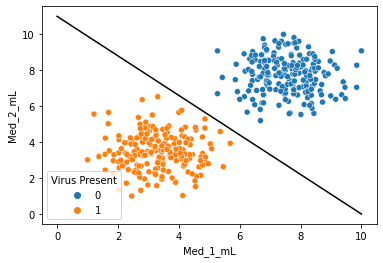

In [12]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df, hue='Virus Present')

# HYPERPLANE (2d line)

x = np.linspace(0, 10, 100)
m = -1.1
b = 11
y = m*x + b
plt.plot(x, y, 'black')

In [14]:
from sklearn.svm import SVC

In [22]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [19]:
X = df.drop('Virus Present', axis=1)

In [20]:
y = df['Virus Present']

In [35]:
model = SVC(kernel='linear', C=1000)

In [36]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [37]:
from svm_margin_plot import plot_svm_boundary

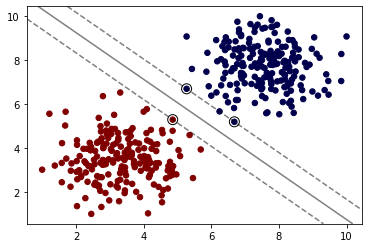

In [38]:
plot_svm_boundary(model, X, y)

In [43]:
model = SVC(kernel='linear', C=0.005)
model.fit(X, y)

SVC(C=0.005, kernel='linear')

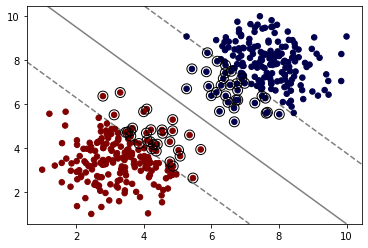

In [44]:
plot_svm_boundary(model, X, y)

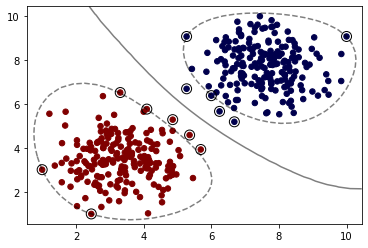

In [60]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X, y)
plot_svm_boundary(model, X, y)

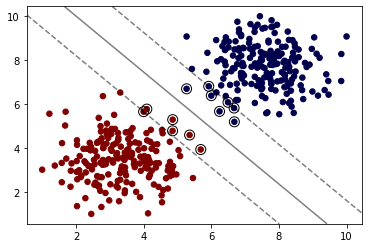

In [66]:
model = SVC(kernel='poly', degree=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [67]:
from sklearn.model_selection import GridSearchCV

In [69]:
svm = SVC()
param_grid = {'C':[0.01, 0.1, 1], 'kernel':['linear', 'rbf']}

In [70]:
grid = GridSearchCV(svm, param_grid)

In [71]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [72]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

## Regression

In [73]:
df = pd.read_csv("../DATA/cement_slump.csv")

In [74]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

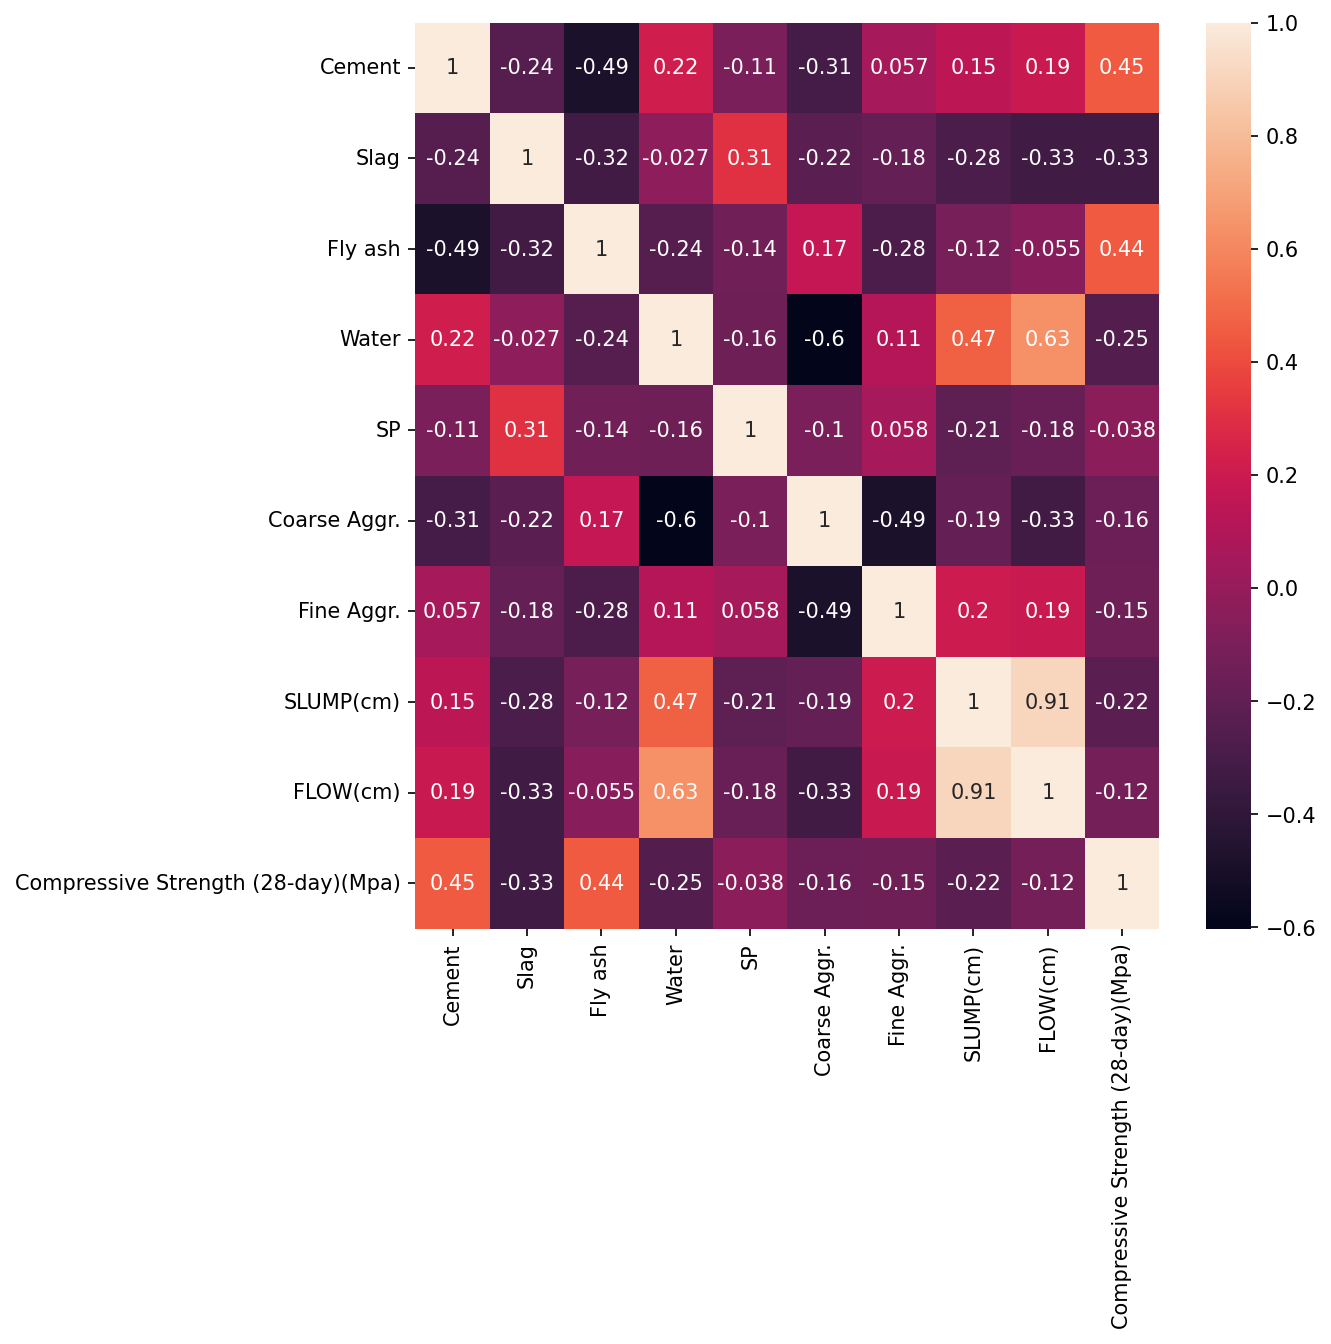

In [82]:
plt.figure(figsize=(8,8), dpi=150)
sns.heatmap(df.corr(), annot=True)

In [83]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [75]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)

In [77]:
y = df['Compressive Strength (28-day)(Mpa)']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
scaled_X_train = scaler.fit_transform(X_train)

In [89]:
scaled_X_test = scaler.transform(X_test)

In [90]:
from sklearn.svm import SVR, LinearSVR

In [92]:
# help(SVR)

In [93]:
base_model = SVR()

In [95]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [96]:
base_preds = base_model.predict(scaled_X_test)

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [100]:
mean_absolute_error(y_test, base_preds)

5.236902091259179

In [101]:
np.sqrt(mean_squared_error(y_test, base_preds))

6.695914838327133

In [104]:
y_test.mean()

36.26870967741935

In [109]:
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1], 
             'kernel':['linear', 'rbf', 'poly'], 
              'gamma': ['scale', 'auto'],
             'degree': [2, 3, 4],
             'epsilon':[0, 0.01, 0.1, 0.5, 1, 2]}

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
svr = SVR()

In [112]:
grid = GridSearchCV(svr, param_grid)

In [113]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [114]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [115]:
grid_preds = grid.predict(scaled_X_test)

In [116]:
mean_absolute_error(y_test, grid_preds)

2.512801221076198

In [ ]:
np.sqrt(mean_squared_error(y_test, grid))